## Import libraries and load data

In [18]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

cols = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol", "quality"]
pd_data = pd.read_csv("winequality-red.csv", sep=";", header=0, names=cols)

pd_data.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Exploratory Data Analysis

In [16]:
pd_data.describe(include="all")

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [19]:
pd_data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

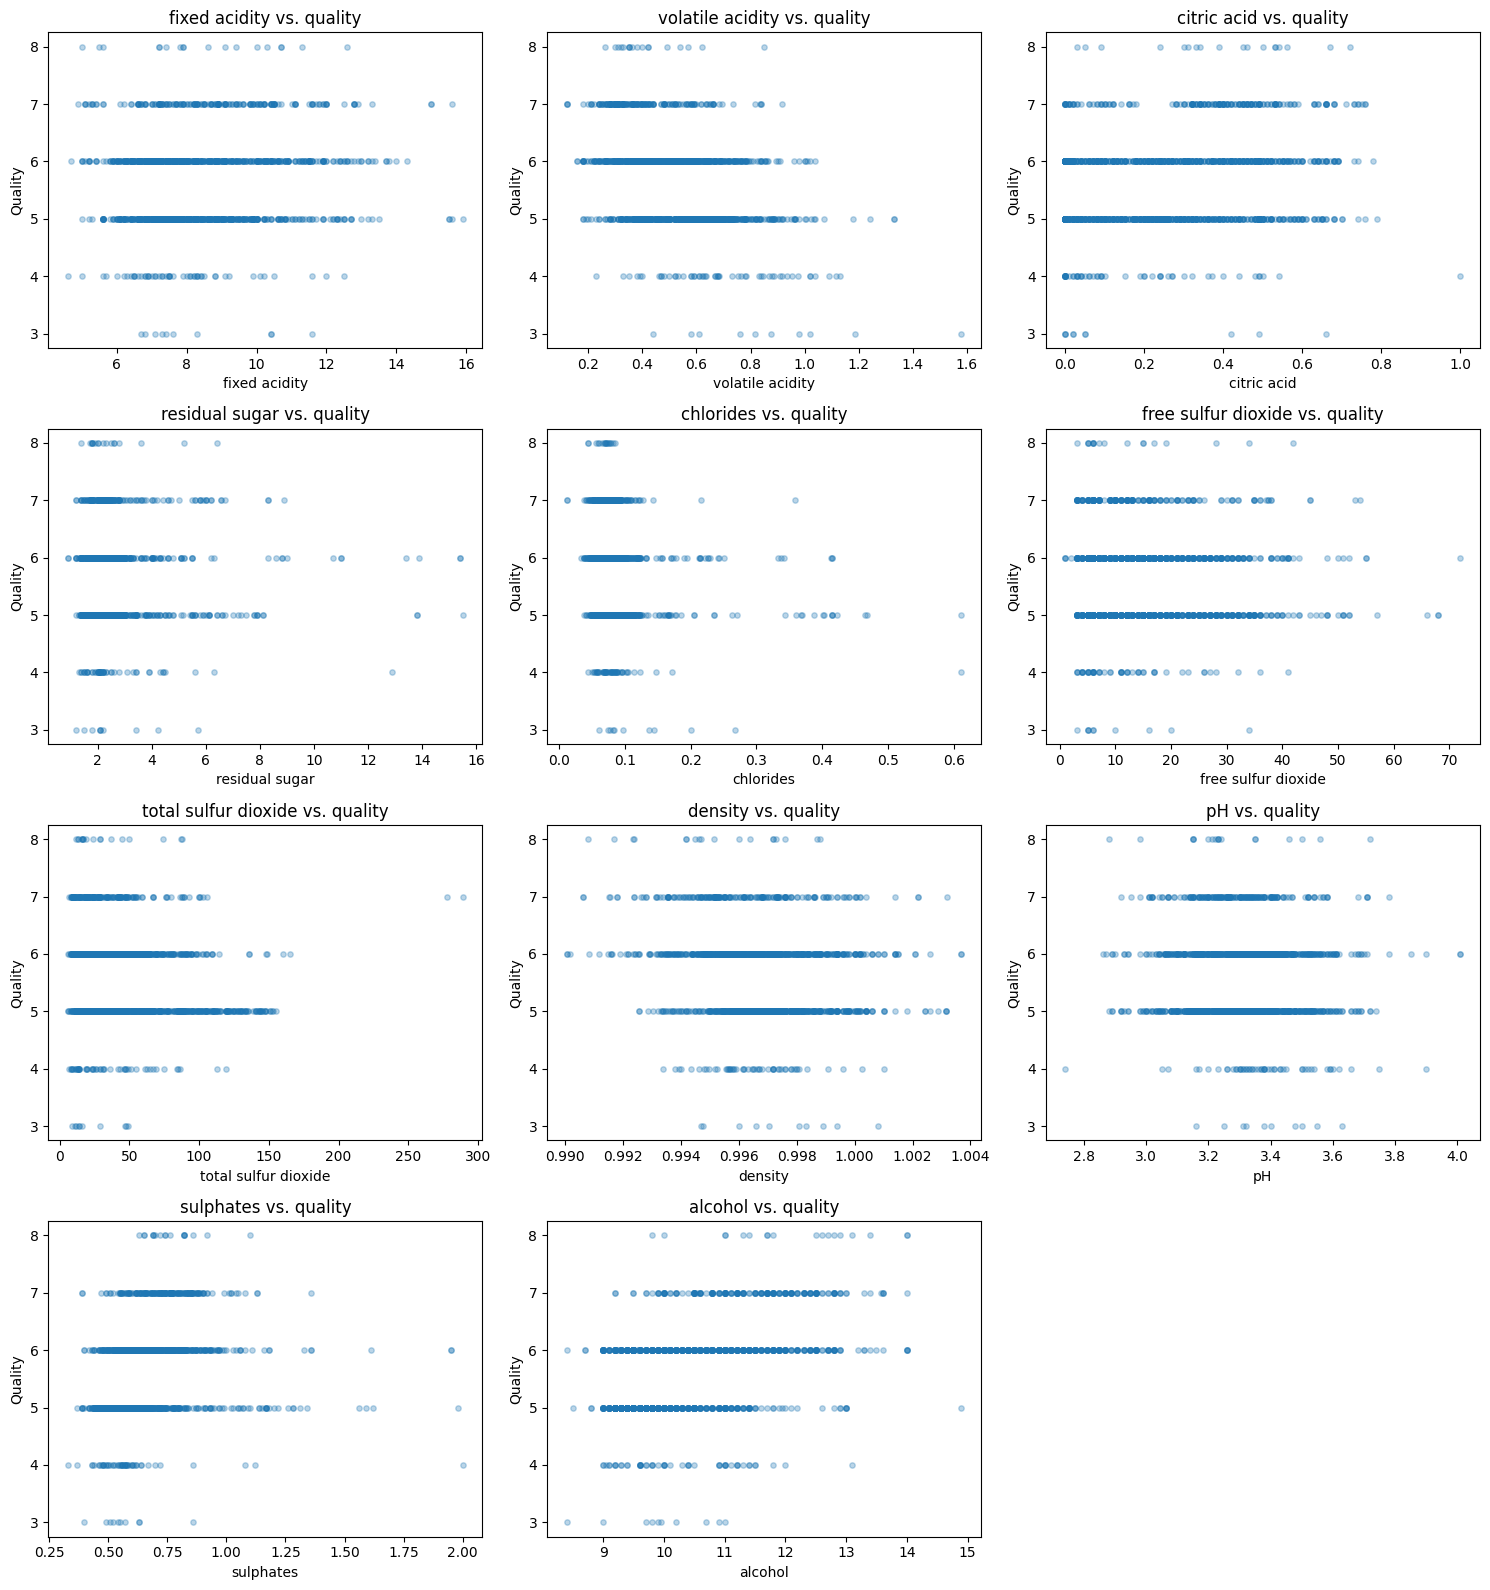

In [23]:
features = [c for c in pd_data.columns if c != "quality"]
cols = 3
rows = int(np.ceil(len(features) / cols))

fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4), squeeze=False)

for ax, feature in zip(axes.ravel(), features):
    ax.scatter(pd_data[feature], pd_data["quality"], alpha=0.3, s=15, color="#1f77b4")
    ax.set_xlabel(feature)
    ax.set_ylabel("Quality")
    ax.set_title(f"{feature} vs. quality")

for ax in axes.ravel()[len(features):]:
    ax.axis("off")

fig.tight_layout()
plt.show()

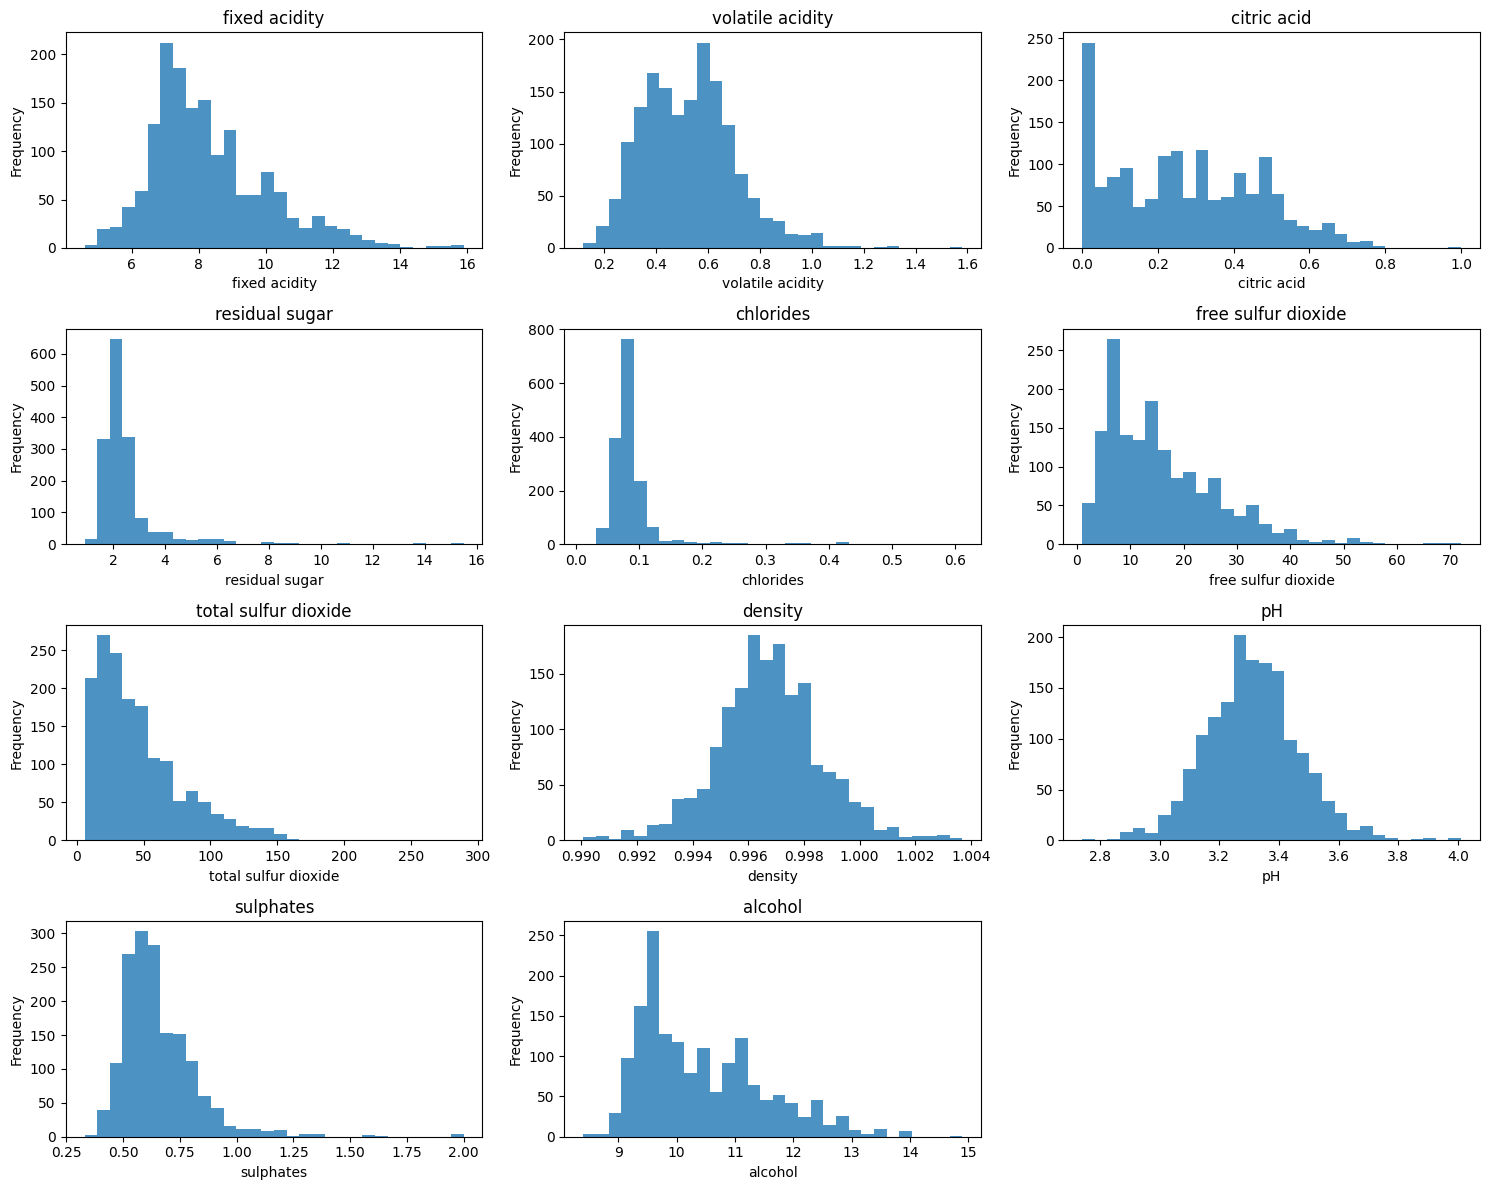

In [ ]:

def plot_feature_distributions(df, bins=30, cols=3, figsize=(15, 12), exclude=None):
    exclude = set(exclude or [])
    numeric_cols = [c for c in df.select_dtypes(include=[np.number]).columns if c not in exclude]
    if not numeric_cols:
        raise ValueError("No numeric columns available to plot.")
    
    rows = int(np.ceil(len(numeric_cols) / cols))
    fig, axes = plt.subplots(rows, cols, figsize=figsize, squeeze=False)
    
    for ax, col in zip(axes.ravel(), numeric_cols):
        ax.hist(df[col].dropna(), bins=bins, color="#1f77b4", alpha=0.8)
        ax.set_title(col)
        ax.set_xlabel(col)
        ax.set_ylabel("Frequency")
    
    # Hide any unused axes
    for ax in axes.ravel()[len(numeric_cols):]:
        ax.set_visible(False)
    
    fig.tight_layout()
    plt.show()

plot_feature_distributions(pd_data, exclude=["quality"])

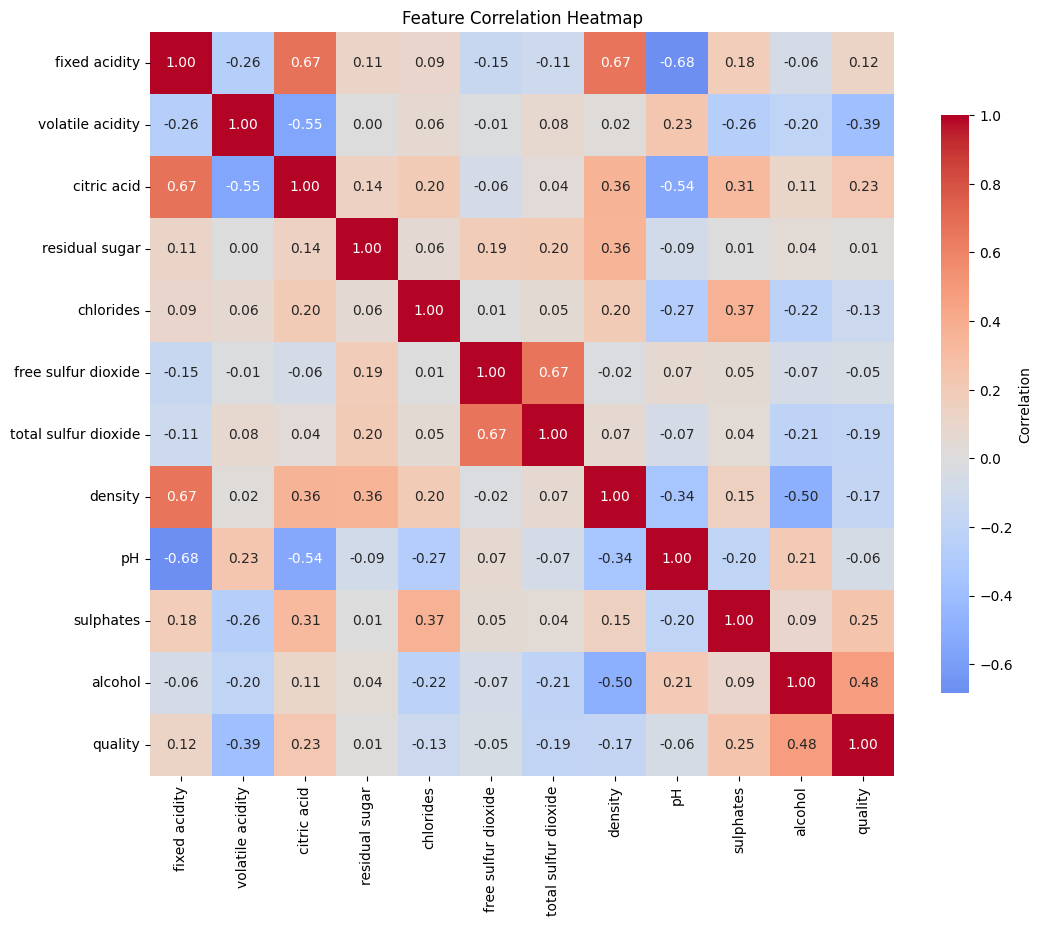

alcohol                 0.476166
volatile acidity       -0.390558
sulphates               0.251397
citric acid             0.226373
total sulfur dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
fixed acidity           0.124052
pH                     -0.057731
free sulfur dioxide    -0.050656
residual sugar          0.013732
Name: quality, dtype: float64

In [25]:
import seaborn as sns

corr = pd_data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(
    corr,
    cmap="coolwarm",
    center=0,
    annot=True,
    fmt=".2f",
    square=True,
    cbar_kws={"shrink": 0.75, "label": "Correlation"}
)
plt.title("Feature Correlation Heatmap")
plt.show()

quality_corr = corr["quality"].drop("quality").sort_values(key=abs, ascending=False)
display(quality_corr)

## Models

In [34]:
from sklearn.model_selection import train_test_split

y = pd_data["quality"]
X = pd_data.drop(columns=["quality"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_confusion_matrix(
    y_true,
    y_pred,
    labels=None,
    normalize=None,
    title="Confusion Matrix",
    cmap="Blues",
    ax=None,
    show_values=True
):
    """
    Plot a confusion matrix with optional normalization.

    Parameters
    ----------
    y_true : array-like
        Ground-truth labels.
    y_pred : array-like
        Predicted labels.
    labels : list, optional
        Explicit ordering of label names (defaults to sorted unique labels).
    normalize : {'true', 'pred', 'all'}, optional
        Normalization mode passed to sklearn.metrics.confusion_matrix.
    title : str
        Plot title.
    cmap : str or Colormap
        Matplotlib colormap.
    ax : matplotlib.axes.Axes, optional
        Axis to draw on; if None, creates a new figure.
    show_values : bool
        Whether to annotate the cells with numeric values.
    """
    if labels is None:
        labels = np.unique(np.concatenate([y_true, y_pred]))

    cm = confusion_matrix(y_true, y_pred, labels=labels, normalize=normalize)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

    if ax is None:
        fig, ax = plt.subplots(figsize=(6, 5))
    disp.plot(ax=ax, cmap=cmap, colorbar=True, values_format=".2f" if normalize else "d")

    if not show_values:
        for text in disp.text_.ravel():
            text.set_visible(False)

    ax.set_title(title)
    plt.tight_layout()
    return ax

In [35]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.pipeline import Pipeline

skewed_features = [
    "residual sugar",
    "chlorides",
    "free sulfur dioxide",
    "total sulfur dioxide",
    "sulphates"
]

remaining_features = [
    c for c in pd_data.columns
    if c not in skewed_features and c != "quality"
]

log_transformer = Pipeline([
    ("log", FunctionTransformer(np.log1p, validate=False)),
    ("scaler", StandardScaler())
])

standard_transformer = Pipeline([
    ("scaler", StandardScaler())
])

preprocess = ColumnTransformer(
    transformers=[
        ("log_scale", log_transformer, skewed_features),
        ("scale", standard_transformer, remaining_features)
    ],
    remainder="drop",
    n_jobs=None
)

### SVM

In [55]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix

svm_pipeline = Pipeline([
    ("preprocess", preprocess),
    ("svm", SVC(kernel="rbf", class_weight="balanced", probability=True))
])

svm_param_grid = {
    "svm__C": [0.1, 1, 10, 50],
    "svm__gamma": ["scale", 0.01, 0.1]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

svm_grid = GridSearchCV(
    svm_pipeline,
    svm_param_grid,
    cv=cv,
    scoring="accuracy",
    n_jobs=-1
)

svm_grid.fit(X_train, y_train)
best_svm = svm_grid.best_estimator_

y_pred = best_svm.predict(X_test)
best_svm.score(X_test, y_test)
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.17      0.18      0.17        11
           5       0.70      0.69      0.69       136
           6       0.63      0.62      0.62       128
           7       0.56      0.60      0.58        40
           8       0.25      0.33      0.29         3

    accuracy                           0.62       320
   macro avg       0.38      0.40      0.39       320
weighted avg       0.62      0.62      0.62       320



/Volumes/Workspace/WashU/ESE4170/FinalProject/ESE4170_FinalProject/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Volumes/Workspace/WashU/ESE4170/FinalProject/ESE4170_FinalProject/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Volumes/Workspace/WashU/ESE4170/FinalProject/ESE4170_FinalProject/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

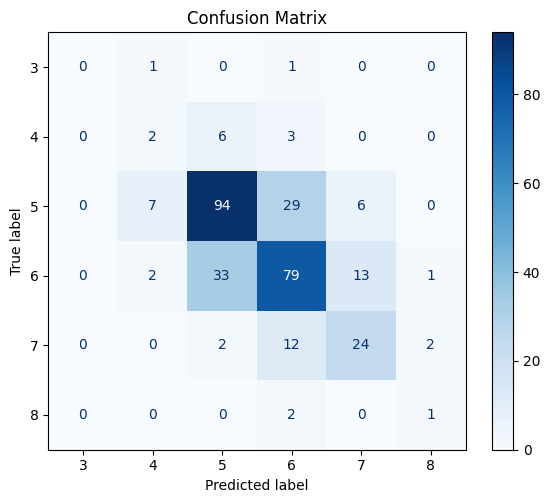

In [56]:
plot_confusion_matrix(y_test, y_pred)

### Random Forest

In [57]:
from sklearn.ensemble import RandomForestClassifier

rf_pipeline = Pipeline([
    ("preprocess", preprocess),
    ("rf", RandomForestClassifier(class_weight="balanced", random_state=42))
])

rf_param_grid = { 
    "rf__n_estimators": [200, 400], 
    "rf__max_depth": [None, 10, 20], 
    "rf__min_samples_leaf": [1, 3, 5] 
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rf_grid = GridSearchCV(
    rf_pipeline,
    rf_param_grid,
    cv=cv,
    scoring="accuracy",
    n_jobs=-1
)

rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_

y_pred = best_rf.predict(X_test)
best_rf.score(X_test, y_test)
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.72      0.79      0.76       136
           6       0.65      0.74      0.69       128
           7       0.82      0.45      0.58        40
           8       0.50      0.33      0.40         3

    accuracy                           0.69       320
   macro avg       0.45      0.39      0.40       320
weighted avg       0.67      0.69      0.67       320



/Volumes/Workspace/WashU/ESE4170/FinalProject/ESE4170_FinalProject/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Volumes/Workspace/WashU/ESE4170/FinalProject/ESE4170_FinalProject/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Volumes/Workspace/WashU/ESE4170/FinalProject/ESE4170_FinalProject/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

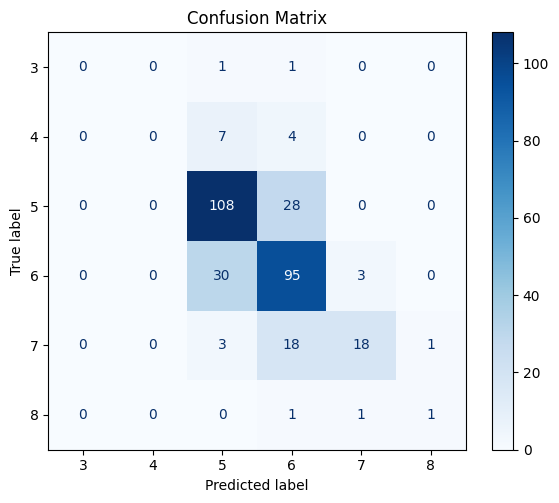

In [58]:
plot_confusion_matrix(y_test, y_pred)

### ANN

In [61]:
from sklearn.neural_network import MLPClassifier

mlp_pipeline = Pipeline([
    ("preprocess", preprocess),
    ("mlp", MLPClassifier(
        activation="relu",
        solver="adam",
        max_iter=500,
        early_stopping=True,
        validation_fraction=0.1,
        random_state=42
    ))
])

mlp_param_grid = {
    "mlp__hidden_layer_sizes": [(64,), (128,), (64, 32)],
    "mlp__alpha": [0.0001, 0.001, 0.01]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

mlp_grid = GridSearchCV(
    estimator=mlp_pipeline,
    param_grid=mlp_param_grid,
    cv=cv,
    scoring="accuracy",
    n_jobs=-1,
    return_train_score=True
)

mlp_grid.fit(X_train, y_train)
best_mlp = mlp_grid.best_estimator_

y_pred = best_mlp.predict(X_test)
best_mlp.score(X_test, y_test)
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.64      0.72      0.68       136
           6       0.51      0.66      0.57       128
           7       0.00      0.00      0.00        40
           8       0.00      0.00      0.00         3

    accuracy                           0.57       320
   macro avg       0.19      0.23      0.21       320
weighted avg       0.47      0.57      0.52       320



/Volumes/Workspace/WashU/ESE4170/FinalProject/ESE4170_FinalProject/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Volumes/Workspace/WashU/ESE4170/FinalProject/ESE4170_FinalProject/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Volumes/Workspace/WashU/ESE4170/FinalProject/ESE4170_FinalProject/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

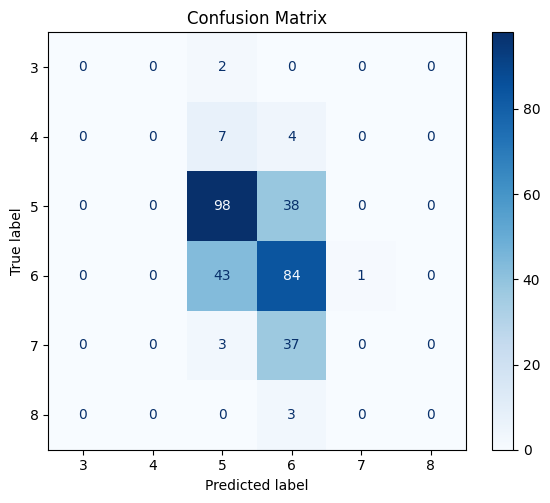

In [62]:
plot_confusion_matrix(y_test, y_pred)